
# Praktikum VIII

Selamat datang pada sesi ke-8 praktikum unggulan Universitas Gunadarma. Melanjutkan kegiatan praktikum sebelumnya, pada minggu ini Anda akan melanjutkan tahapan pengolahan data yaitu data training dan model generation. 

### Dataset
Dataset yang Anda gunakan yaitu dataset Beton (concrete) yang berisi informasi mengenai komposisi beton, pengaruh waktu dan hasil kekuatan beton yang berisi 1030 row data dengan 9 fitur. 

### Studi Kasus
Dengan menggunakan dataset tersebut Anda akan diminta menyelesaikan permasalahan klasifikasi, dimana model akan diminta untuk menentukan kekuatan beton berdasarkan kombinasi fitur yang dimiliki. 

### Algoritma
Algoritma yang digunakan adalah K-Nearest Neighbour.

# Import Dataset


In [1]:
# Import library
import pandas as pd
import numpy as np


In [2]:
#### import dataset 
data = pd.read_csv('https://gitlab.com/andreass.bayu/file-directory/-/raw/main/new_concreate.csv')

# Lihat 5 data awal
data.head(5)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,NaN,203.5,NaN,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,NaN,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,NaN,228.0,NaN,932.0,670.0,28,45.85
4,154.8,183.4,NaN,193.3,9.1,1047.4,696.7,28,18.29


# Review Dataset

In [3]:
# Lihat deskripsi dari tiap kolom
data.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,559.000000,464.000000,1030.000000,651.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,136.158676,120.288793,181.567282,9.816897,972.918932,773.580485,45.662136,35.817961
std,104.506364,72.351823,33.675470,21.354219,4.580328,77.753954,80.175980,63.169912,16.705742
min,102.000000,11.000000,24.500000,121.800000,1.700000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,95.000000,97.850000,164.900000,6.950000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,135.700000,121.400000,185.000000,9.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,189.000000,141.000000,192.000000,11.600000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [4]:
# Lihat tipe data dari tiap kolom
data.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [5]:
# mlihat jumlah atribut dan data / dimensi data
data.shape

(1030, 9)

In [6]:
# hitung dan melihat jumlah data per label kelas
for col in data.columns:
    print('Attribute name:',col)
    print('-------------------')
    print(data[col].value_counts())
    print('-------------------')

Attribute name: cement
-------------------
425.0    20
362.6    20
251.4    15
446.0    14
310.0    14
         ..
312.9     1
261.9     1
325.6     1
143.8     1
145.4     1
Name: cement, Length: 278, dtype: int64
-------------------
Attribute name: slag
-------------------
189.0    30
106.3    20
24.0     14
20.0     12
145.0    11
         ..
161.0     1
100.6     1
117.6     1
129.0     1
167.0     1
Name: slag, Length: 184, dtype: int64
-------------------
Attribute name: ash
-------------------
118.3    20
141.0    16
24.5     15
79.0     14
94.0     13
         ..
119.0     1
134.0     1
95.0      1
130.0     1
129.7     1
Name: ash, Length: 155, dtype: int64
-------------------
Attribute name: water
-------------------
192.0    118
228.0     54
185.7     46
203.5     36
186.0     28
        ... 
165.0      1
237.0      1
166.7      1
191.3      1
184.4      1
Name: water, Length: 195, dtype: int64
-------------------
Attribute name: superplastic
-------------------
11.6    37
8

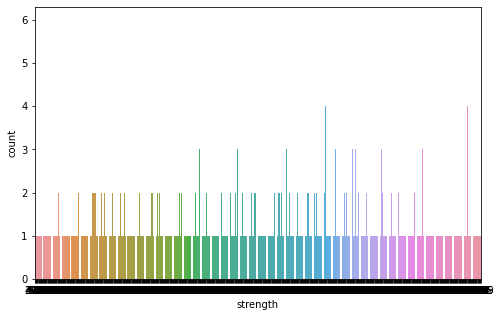

In [7]:
#import library seaborn untuk visualisasi
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Plot figure untuk menentukan distribusi kelas
plt.figure(figsize=(8,5))

# menghitung baris setiap kelas
sns.countplot(x="strength", data=data)

#### *Dataset memiliki distribusi nilai untuk kelas strength yang beragam.*

# Dataset preparation

In [8]:
# Buat salinan dataframe
df = data.copy(deep = True)

# mengubah/convert nilai "?" nilai ke bentuk Na / NaN untuk diproses lebih lanjut
for col in data.columns:
  df[[col]] = data[[col]].replace('?',np.NaN)


In [9]:

# seleksi kolom fitur/feature columns dari dataset
null_data = df.iloc[:,:-1]

# temukan nilai null untuk semua atribut dan jumlahkan total nilai null
null_data.isnull().sum()

cement            0
slag            471
ash             566
water             0
superplastic    379
coarseagg         0
fineagg           0
age               0
dtype: int64

In [10]:

# jatuhkan/drop semua baris yang memiliki nilai null
df = df.dropna()

# pilih kolom fitur/feature columns dari dataset
null_data = df.iloc[:,:-1]

# cek ulang nilai null
null_data.isnull().sum()


cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
dtype: int64

**StandardScaler** *adalah class dari sklearn untuk melakukan normalisasi data agar data yang digunakan tidak memiliki penyimpangan yang besar.*

In [11]:
# Import library standard scaler 

from sklearn.preprocessing import StandardScaler

# Buat dataframe dengan tipe data int64
colname= []
for col in df.columns:
  if df[col].dtype == "int64":
      colname.append(col)

# Buat salinan dataset untuk keperluan persiapan data / data preparation
df_copy = df.copy(deep = True)
df_fe = df.copy()


# Buat kerangka data untuk fitur kategoris / categorical features
df_fe.drop('strength',axis='columns', inplace=True)
df_fe.drop(colname,axis='columns', inplace=True)


# buat dataframe untuk kelas target / target class
df_cl = df.copy()
df_cl.drop(df_copy.iloc[:,:-1],axis='columns', inplace=True)



# membuat objek scaler / scaler object
std_scaler = StandardScaler()
std_scaler


# Normalisasikan atribut numerik dan tetapkan ke dalam dataframe baru
df_norm = pd.DataFrame(std_scaler.fit_transform(df_copy[colname]), columns=colname)

Mengapa Menskalakan data untuk KNN?
Ketika Anda menggunakan algoritma berbasis jarak seperti KNN, proses penyesuaian skala data sangatlah penting karena akan mempengaruhi nilai dari proses perhitungan jarak dilakukan dengan skala yang sama.

Sebagai ilustrasi perhitungan jarak menggunakan dua fitur yang besaran/rentangnya sangat bervariasi dengan menggunakan perhitungan jarak eucledian.
Jarak Euclidean = [(100000–80000)^2 + (30–25)^2]^(1/2)

fitur dengan jangkauan yang lebih besar akan mendominasi atau mengecilkan fitur yang lebih kecil sepenuhnya dan ini akan berdampak pada kinerja semua model berbasis jarak karena akan memberikan bobot yang lebih tinggi pada variabel yang memiliki nilai yang lebih tinggi.¶

In [12]:
# import library Ordinal Encoder dari package library sklearn.preprocessing 
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()

# enconde fitur kategoris/categorical features menjadi fitur numerik/numerical features   
for col in df_fe.columns[:]:
  if df_fe[col].dtype == "object":
    df_fe[col] = ord_enc.fit_transform(df_fe[[col]])
    

#### Karena dataset ini belum memiliki label kelas, mari kita tentukan kolom strength sebagai kolom 'target' yang ingin di prediksi. Berdasarkan hasil analisa statistik awal, didapatkan nilai rata-rata dari kolom strength adalah 35, sehingga mari kita tentukan bahwa threshold(batas ambang) dari sebuah campuran semen yang di nilai kuat adalah yang memiliki nilai strength > 35.

Sehingga, selanjutnya kita akan melakukan proses encoding untuk kolom fitru strength, dimana nilai yang > 35 akan diubah menjadi nilai 1 (yang berarti kuat) dan nilai <35 diubah menjadi nilai 0 (yang berarti kategori kurang kuat)

In [13]:
# Melakukan proses encoding untuk mengubah fitur strength menjadi nilai biner. 
df_cl["strength"] = np.where(df_cl["strength"]<35, 0, 1)    

In [14]:
# Masukkan kolom id ke datasets yang berbeda
df_norm.insert(0, 'id', range(0, 0 + len(df_norm)))
df_fe.insert(0, 'id', range(0, 0 + len(df_fe)))
df_cl.insert(0, 'id', range(0, 0 + len(df_cl)))

# Lihat shapes datasets yang telah di proses 
print(df_norm.shape)
print(df_fe.shape)
print(df_cl.shape)

(225, 2)
(225, 8)
(225, 2)


In [15]:
# Gabungkan semua datasets
df_feature = pd.merge(df_norm,df_fe, on=["id"])
df_final = pd.merge(df_feature,df_cl, on=["id"])

# Drop kolom id dari gabungan dataset
df_final.drop('id',axis='columns', inplace=True)

# Lihat 5 data awal dari gabungan dataset
df_final.head(5)

,age,cement,slag,ash,water,superplastic,coarseagg,fineagg,strength
0,-0.720253,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,0
1,-0.129574,155.0,184.0,143.0,194.0,9.0,880.0,699.0,0
2,-0.129574,151.8,178.1,138.7,167.5,18.3,944.0,694.6,1
3,-0.129574,167.0,187.0,195.0,185.0,7.0,898.0,636.0,0
4,2.908201,213.8,98.1,24.5,181.7,6.7,1066.0,785.5,1


# Visualization

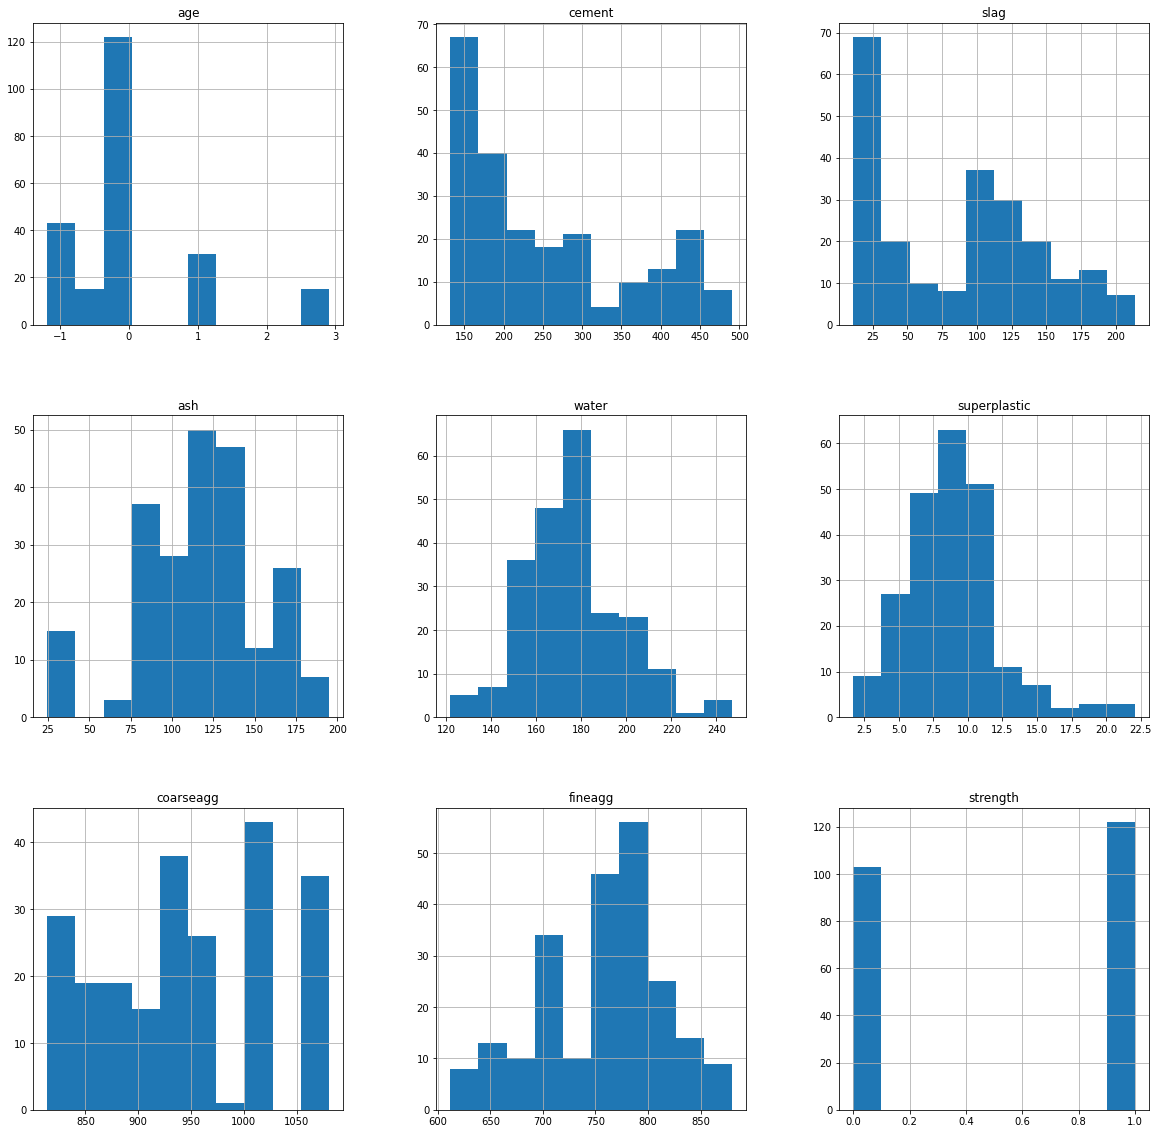

In [16]:
p = df_final.hist(figsize = (20,20))

**Scatter matrix plot adalah** plot yang digunakan untuk membuat sekumpulan scatter plot dari beberapa pasang variabel. Hal ini sangat bermanfaat terutama ketika ingin menganalisis bagaimana bentuk hubungan antar variabel. Plot ini sangat bermanfaat untuk digunakan untuk data yang ukurannya tidak terlalu besar. Untuk menggunakan scatter matrix kita harus memanggil fungsi *scatter_matrix* dari *pandas.plotting*

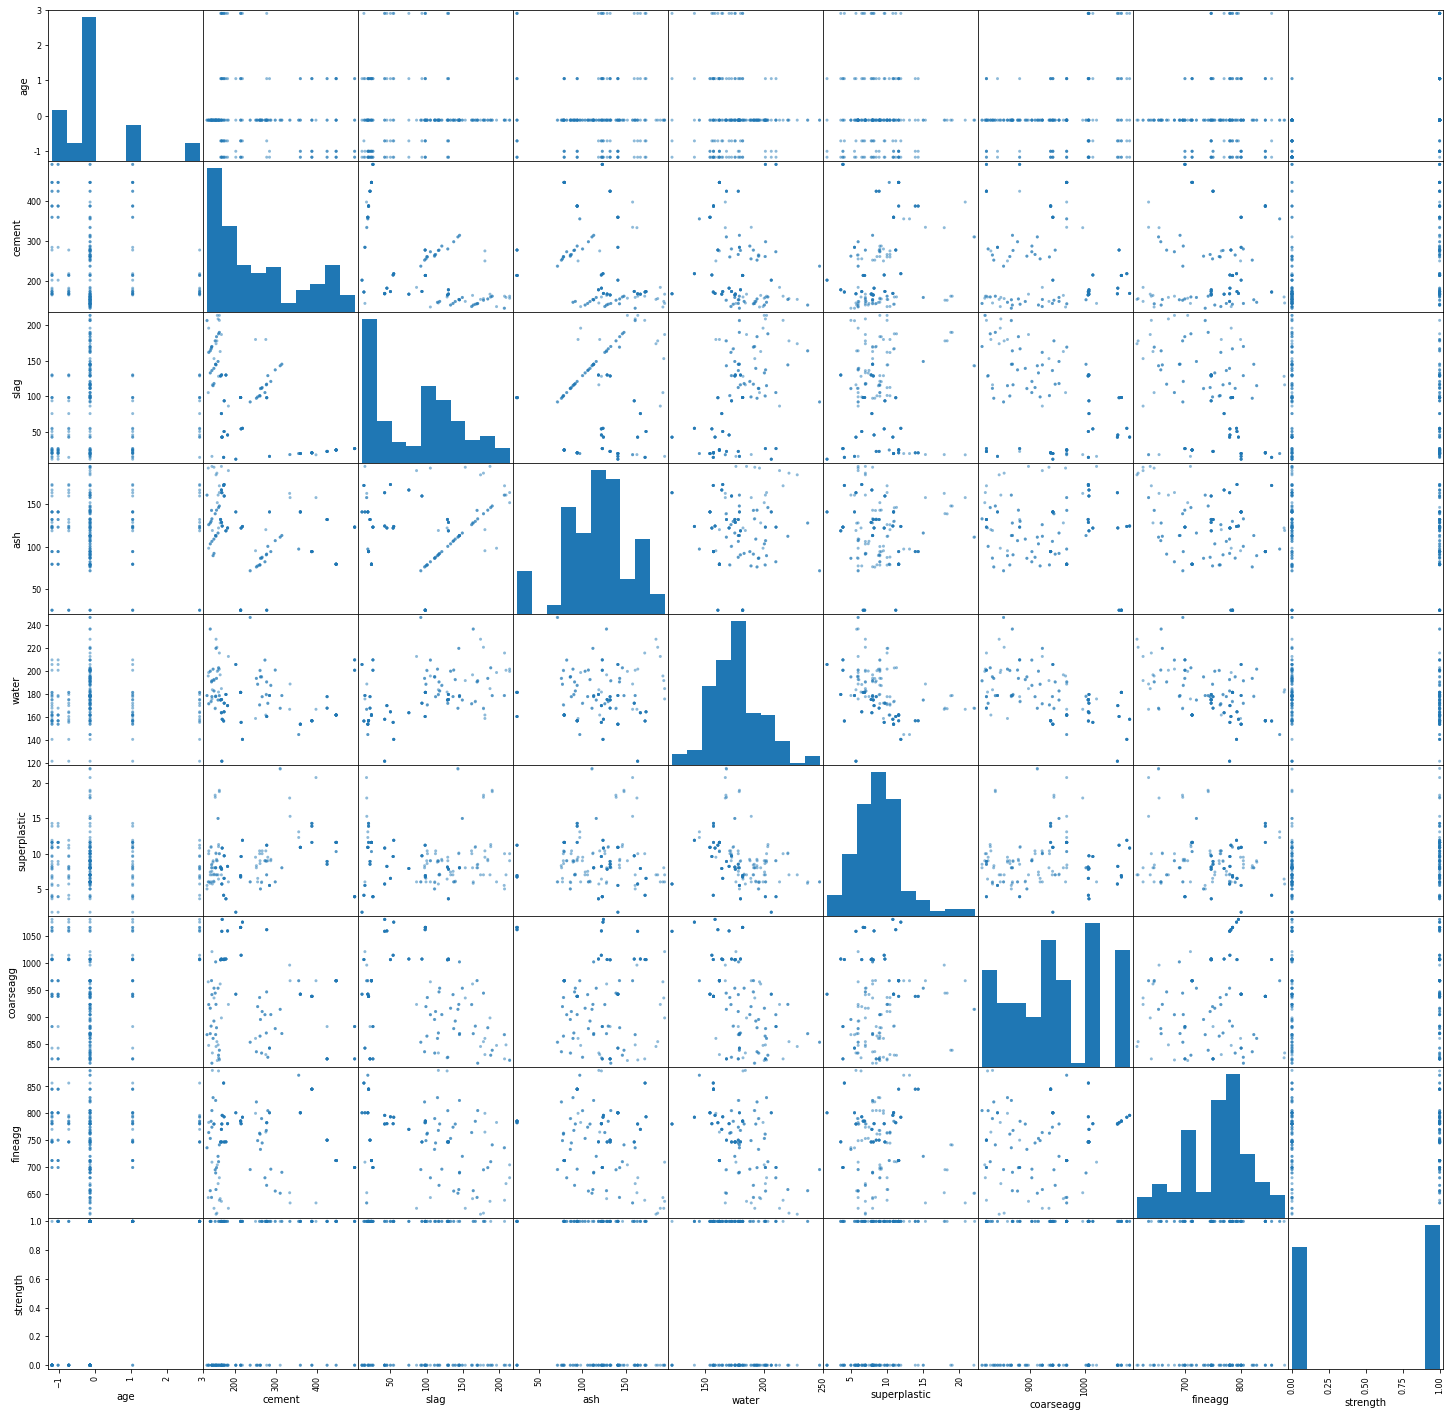

In [17]:
from pandas.plotting import scatter_matrix

p=scatter_matrix(df_final,figsize=(25, 25))

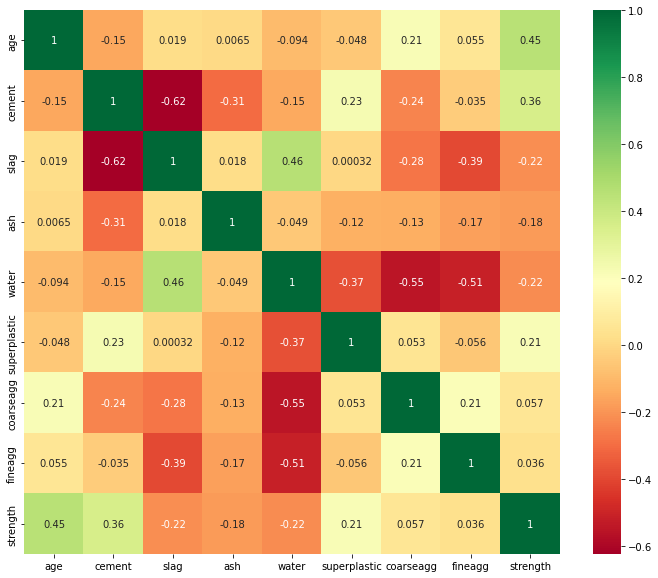

In [18]:
# Buat visualisasi korelasi data dengan heatmap
import seaborn as sns
import matplotlib.pyplot as plt

 # plot heatmap
plt.figure(figsize=(12,10))
p=sns.heatmap(df_final.corr(), annot=True,cmap ='RdYlGn')

#### Koefisien Korelasi Pearson: 

Koefisien pearson mambantu kita mengetahui keterhubungan antara dua fitur atau variable. Nilai Koefisien Korelasi Pearson dapat berkisar antara -1 sampai +1. 1 berarti sangat berkorelasi dan 0 berarti tidak ada korelasi.

Heatmap diatas merupakan hasil visualisasi representasi informasi dua dimensi dengan bantuan gradasi warna untuk mempermudah interpretasi hasil. 

# Proses Modelling dengan KNN 

In [19]:
## menampilkan 5 data awal dari dataset yang akan digunakan
df_final.head(5)

,age,cement,slag,ash,water,superplastic,coarseagg,fineagg,strength
0,-0.720253,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,0
1,-0.129574,155.0,184.0,143.0,194.0,9.0,880.0,699.0,0
2,-0.129574,151.8,178.1,138.7,167.5,18.3,944.0,694.6,1
3,-0.129574,167.0,187.0,195.0,185.0,7.0,898.0,636.0,0
4,2.908201,213.8,98.1,24.5,181.7,6.7,1066.0,785.5,1


In [20]:
## memisahkan data fitur dengan label yang akan di pelajari
train_data = df_final.drop("strength",axis = 1)
train_data.head()

,age,cement,slag,ash,water,superplastic,coarseagg,fineagg
0,-0.720253,168.9,42.2,124.3,158.3,10.8,1080.8,796.2
1,-0.129574,155.0,184.0,143.0,194.0,9.0,880.0,699.0
2,-0.129574,151.8,178.1,138.7,167.5,18.3,944.0,694.6
3,-0.129574,167.0,187.0,195.0,185.0,7.0,898.0,636.0
4,2.908201,213.8,98.1,24.5,181.7,6.7,1066.0,785.5


In [21]:
## memisahkan data label dengan label yang akan di pelajari
df_final.strength = df_final.strength.astype(np.int64)
label_data = df_final.strength
label_data.head()

0    0
1    0
2    1
3    0
4    1
Name: strength, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(train_data,label_data,test_size=0.4,random_state=42)

# Proses Training 

##### Train Test Split 
Train dan test split dimana kita akan memisahkan data yang akan digunakan oleh algoritma dalam proses training dan testing. Proses ini akan membantu kita melakukan evaluasi terhadap model machine learning yang dibangun.

![1_-8_kogvwmL1H6ooN1A1tsQ.png](attachment:1_-8_kogvwmL1H6ooN1A1tsQ.png)

##### Cross Validation
Ketika model dipecah menjadi pelatihan dan pengujian, ada kemungkinan bahwa jenis titik data tertentu dapat sepenuhnya menjadi bagian pelatihan (training) atau pengujian (testing). Hal ini akan menyebabkan model berkinerja buruk. Oleh karena itu masalah over-fitting dan underfitting dapat dihindari dengan baik dengan teknik validasi silang (cross validation)

![1_4G__SV580CxFj78o9yUXuQ.png](attachment:1_4G__SV580CxFj78o9yUXuQ.png)

##### Stratify 
Parameter stratify membuat pembagian sehingga proporsi nilai dalam sampel yang dihasilkan akan sama dengan proporsi nilai yang diberikan untuk stratifikasi parameter.

Misalnya, jika variabel y adalah variabel kategori biner dengan nilai 0 dan 1 dan ada 25% dari nol dan 75% dari satu, stratify=y akan memastikan bahwa pembagian acak Anda memiliki 25% dari 0 dan 75% dari 1.

For Reference : https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6

Nilai k KNN yang optimal adalah 1
Skor optimalnya adalah 0.70


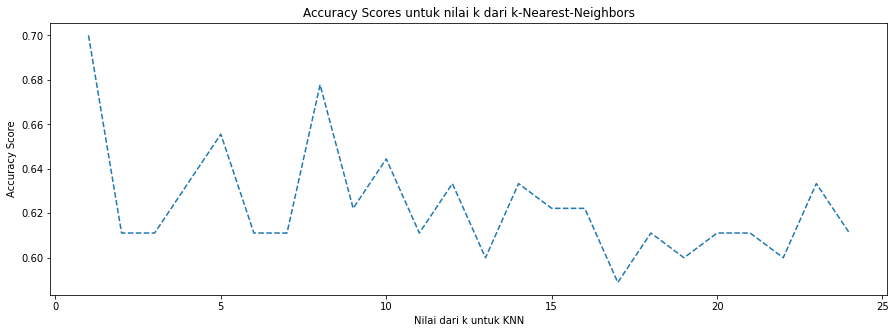

In [23]:
# import library model KNN dengan alias/as 'KNeighborsClassifier'
from sklearn.neighbors import KNeighborsClassifier 
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

# buat variabel kosong untuk menyimpan metrik KNN/KNN metrics
scores=[]
# Kita coba nilai k yang berbeda untuk KNN (dari k=1 sampai k=26)
lrange=list(range(1,25))
# loop proses KNN
for k in lrange:
  # masukkan nilai k dan ukuran 'jarak'
  knn=KNeighborsClassifier(n_neighbors=k)
  # masukan data train/ data latih untuk melatih KNN
  knn.fit(X_train,y_train.ravel())
  # lihat prediksi KNN dengan memasukkan data uji/data test
  y_pred=knn.predict(X_test)
  # tambahkan performance metric akurasi
  scores.append(metrics.accuracy_score(y_test,y_pred))
plt.figure(2,figsize=(15,5))


optimal_k = lrange[scores.index(max(scores))]
print("Nilai k KNN yang optimal adalah %d" % optimal_k)
print("Skor optimalnya adalah %.2f" % max(scores))


# plot hasilnya
plt.plot(lrange, scores,ls='dashed')
plt.xlabel('Nilai dari k untuk KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores untuk nilai k dari k-Nearest-Neighbors')
plt.show()

In [24]:
knn = KNeighborsClassifier(13)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.6

# Evaluasi Hasil Matriks

##### Presisi 
Presisi adalah rasio pengamatan positif yang diprediksi dengan benar dengan total pengamatan positif yang diprediksi. Pertanyaan yang dijawab metrik ini adalah dari semua penumpang yang berlabel selamat, berapa banyak yang benar-benar selamat? Presisi tinggi berhubungan dengan tingkat positif palsu yang rendah. 

#### Presisi = TP/TP+FP

##### Recall (Sensitivity) 
Recall adalah rasio pengamatan positif yang diprediksi dengan benar dengan semua pengamatan di kelas yang sebenarnya - ya. Contoh: Dari semua penumpang yang benar-benar selamat, berapa banyak yang kami beri label? Recall yang lebih besar dari 0,5 adalah baik.

#### Recall = TP/TP+FN

##### Skor F1 
Skor F1 adalah rata-rata tertimbang dari Precision dan Recall. Oleh karena itu, skor ini memperhitungkan positif palsu dan negatif palsu. Secara intuitif tidak semudah memahami akurasi, tetapi F1 biasanya lebih berguna daripada akurasi, terutama jika Anda memiliki distribusi kelas yang tidak merata. Akurasi bekerja paling baik jika positif palsu dan negatif palsu memiliki biaya yang sama. Jika biaya positif palsu dan negatif palsu sangat berbeda, lebih baik melihat Precision dan Recall.

#### Skor F1 = 2(Presisi Recall) / (Recall + Precision)

For Reference: http://joshlawman.com/metrics-classification-report-breakdown-precision-recall-f1/ : https://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/


Text(0.5, 15.0, 'Predicted label')

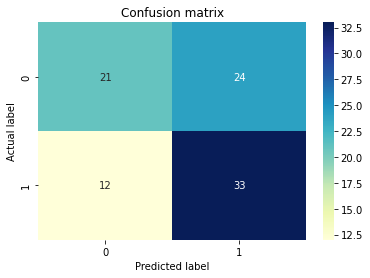

In [25]:
y_pred = knn.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [26]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.64      0.47      0.54        45
           1       0.58      0.73      0.65        45

    accuracy                           0.60        90
   macro avg       0.61      0.60      0.59        90
weighted avg       0.61      0.60      0.59        90



# Instruksi Tugas untuk jurusan teknik mesin, teknik industri, dan agro teknologi pada fakultas FTI, dan fakultas FTSP

Buatlah laporan akhir yang menjelaskan langkah-langkah serta penjelasan tahapan yang Anda lakukan pada praktikum ini, yang didalamnya menjawab beberapa pertanyaan sebagai berikut
1. Pada hasil diagram heatmap, terlihat banyak konfigurasi warna dan nilai yang ditampilkan. Jelaskan arti kolom berwarna merah pada hasil diagram heatmap yang dihasilkan! Pasangan variabel apa saja yang bernilai merah?
2. Apa yang terjadi jika, nilai test set diganti menjadi 0.3 kemudian 0.2 dan 0,1 ? 
3. Buatlah tabel yang berisi hasil pengujian Anda dan sertakan berapa nilai k dan nilai akurasi untuk masing-masing skenario uji.
4. Apakah terjadi perbedaan nilai akurasi model? Jika Ya, jelaskan pendapat Anda mengapa hal tersebut bisa terjadi.
5. Berapa nilai presisi dan recall dari masing-masing model yang Anda coba serta jelaskan arti dari nilai tersebut.

# Instruksi Tugas untuk fakultas FIKTI dan FTI (kecuali jurusan yang dituliskan diatas)

Buatlah laporan akhir yang menjelaskan langkah-langkah serta penjelasan tahapan yang Anda lakukan pada praktikum ini, yang didalamnya menjawab beberapa pertanyaan sebagai berikut
1. Rubahlah fitur cement menjadi fitur target class yang ingin Anda prediksi, dengan nilai fitur > 281 merupakan kelas 1 dan < 281 menjadi nilai 0. Berapa akurasi model dan nilai k untuk skenario ini?
2. Pada hasil diagram heatmap, terlihat banyak konfigurasi warna dan nilai yang ditampilkan.  Jelaskan arti kolom berwarna merah pada hasil diagram heatmap yang dihasilkan! Pasangan variabel apa saja yang bernilai merah?
3. Apa yang terjadi jika, nilai test set diganti menjadi 0.3 kemudian 0.2 dan 0,1 ? 
4. Buatlah tabel yang berisi hasil pengujian Anda dan sertakan berapa nilai k dan nilai akurasi untuk masing-masing skenario uji.
5. Apakah terjadi perbedaan nilai akurasi model? Jika Ya, jelaskan pendapat Anda mengapa hal tersebut bisa terjadi.
6. Berapa nilai presisi dan recall dari masing-masing model yang Anda coba serta jelaskan arti dari nilai tersebut.

<center><h1>JAWABAN</h1></center>

1. Rubahlah fitur cement menjadi fitur target class yang ingin Anda prediksi, dengan nilai fitur > 281 merupakan kelas 1 dan < 281 menjadi nilai 0. Berapa akurasi model dan nilai k untuk skenario ini?

In [28]:
print(df_final.info())
df_final.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225 entries, 0 to 224
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           225 non-null    float64
 1   cement        225 non-null    float64
 2   slag          225 non-null    float64
 3   ash           225 non-null    float64
 4   water         225 non-null    float64
 5   superplastic  225 non-null    float64
 6   coarseagg     225 non-null    float64
 7   fineagg       225 non-null    float64
 8   strength      225 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 17.6 KB
None


,age,cement,slag,ash,water,superplastic,coarseagg,fineagg,strength
0,-0.720253,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,0
1,-0.129574,155.0,184.0,143.0,194.0,9.0,880.0,699.0,0
2,-0.129574,151.8,178.1,138.7,167.5,18.3,944.0,694.6,1
3,-0.129574,167.0,187.0,195.0,185.0,7.0,898.0,636.0,0
4,2.908201,213.8,98.1,24.5,181.7,6.7,1066.0,785.5,1


In [31]:
df_final['cement'] = df_final['cement'].apply(lambda x: 1 if x >= 281 else 0)
df_final.head()

,age,cement,slag,ash,water,superplastic,coarseagg,fineagg,strength
0,-0.720253,0,42.2,124.3,158.3,10.8,1080.8,796.2,0
1,-0.129574,0,184.0,143.0,194.0,9.0,880.0,699.0,0
2,-0.129574,0,178.1,138.7,167.5,18.3,944.0,694.6,1
3,-0.129574,0,187.0,195.0,185.0,7.0,898.0,636.0,0
4,2.908201,0,98.1,24.5,181.7,6.7,1066.0,785.5,1


In [58]:
def train_knn(df_final, test_size):
  # split fitur & label, juga split train & test set
  X = df_final.drop('cement',axis=1)
  y = df_final['cement']
  
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
  
  # import library model KNN dengan alias/as 'KNeighborsClassifier'
  from sklearn.neighbors import KNeighborsClassifier 
  import sklearn.metrics as metrics
  import matplotlib.pyplot as plt
  
  # buat variabel kosong untuk menyimpan metrik KNN/KNN metrics
  scores=[]
  # Kita coba nilai k yang berbeda untuk KNN (dari k=1 sampai k=26)
  lrange=list(range(1,25))
  # loop proses KNN
  for k in lrange:
    # masukkan nilai k dan ukuran 'jarak'
    knn=KNeighborsClassifier(n_neighbors=k)
    # masukan data train/ data latih untuk melatih KNN
    knn.fit(X_train,y_train.ravel())
    # lihat prediksi KNN dengan memasukkan data uji/data test
    y_pred=knn.predict(X_test)
    # tambahkan performance metric akurasi
    scores.append(metrics.accuracy_score(y_test,y_pred))
  plt.figure(2,figsize=(15,5))
  
  
  optimal_k = lrange[scores.index(max(scores))]
  print("Nilai k KNN yang optimal adalah %d" % optimal_k)
  print("Skor optimalnya adalah %.2f" % max(scores))
  
  
  # plot hasilnya
  plt.plot(lrange, scores,ls='dashed')
  plt.xlabel('Nilai dari k untuk KNN')
  plt.ylabel('Accuracy Score')
  plt.title('Accuracy Scores untuk nilai k dari k-Nearest-Neighbors')
  plt.show()

        
  return [test_size, optimal_k, max(scores)], classification_report(y_test,y_pred)

Nilai k KNN yang optimal adalah 1
Skor optimalnya adalah 1.00


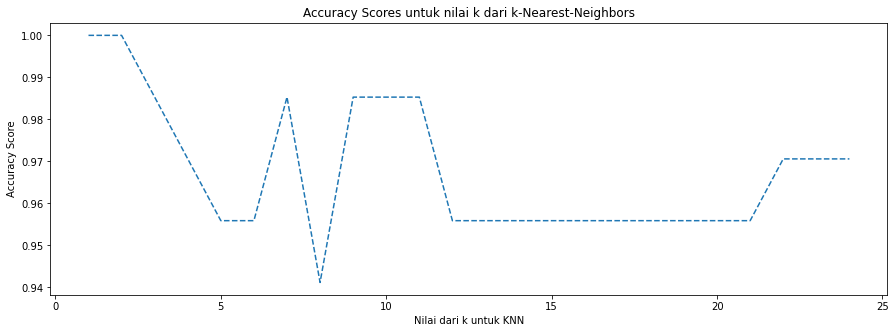

([0.3, 1, 1.0],
 '              precision    recall  f1-score   support\n\n           0       0.96      1.00      0.98        45\n           1       1.00      0.91      0.95        23\n\n    accuracy                           0.97        68\n   macro avg       0.98      0.96      0.97        68\nweighted avg       0.97      0.97      0.97        68\n')

In [59]:
train_knn(df_final, test_size=0.3)

2. Pada hasil diagram heatmap, terlihat banyak konfigurasi warna dan nilai yang ditampilkan.  Jelaskan arti kolom berwarna merah pada hasil diagram heatmap yang dihasilkan! Pasangan variabel apa saja yang bernilai merah?


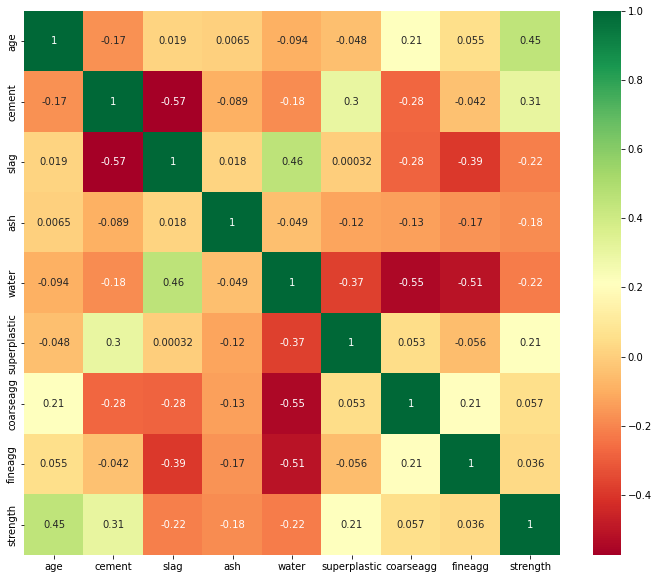

In [54]:
# Buat visualisasi korelasi data dengan heatmap
import seaborn as sns
import matplotlib.pyplot as plt

# plot heatmap
plt.figure(figsize=(12,10))
p=sns.heatmap(df_final.corr(), annot=True,cmap ='RdYlGn')

3. Apa yang terjadi jika, nilai test set diganti menjadi 0.3 kemudian 0.2 dan 0,1 ? 


Nilai k KNN yang optimal adalah 1
Skor optimalnya adalah 1.00


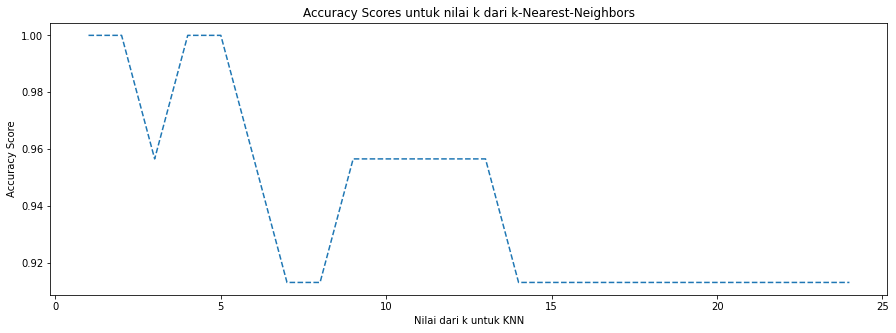

Nilai k KNN yang optimal adalah 1
Skor optimalnya adalah 1.00


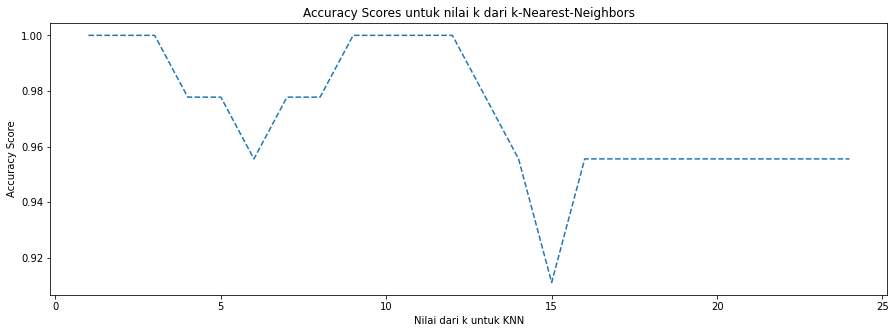

Nilai k KNN yang optimal adalah 1
Skor optimalnya adalah 1.00


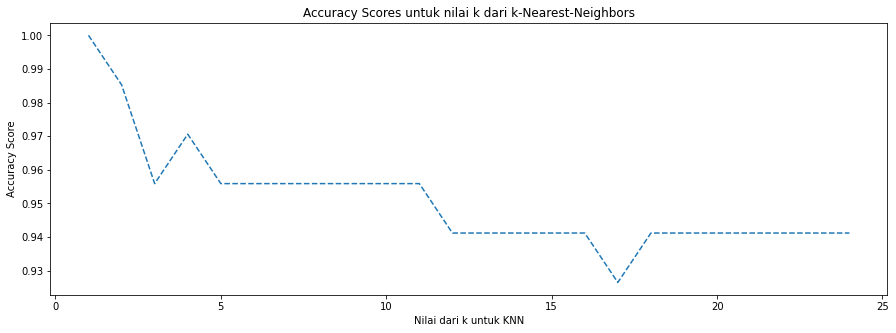

In [60]:
training_results = []
reports = []

for i in range(3):
  test_size = (i + 1) * 0.1
  result, report = train_knn(df_final, test_size=test_size)
  training_results.append(result)
  reports.append(report)

4. Buatlah tabel yang berisi hasil pengujian Anda dan sertakan berapa nilai k dan nilai akurasi untuk masing-masing skenario uji.


In [61]:
training_results = pd.DataFrame(training_results, columns=['test size', 'k', 'akurasi'])
training_results

,test size,k,akurasi
0,0.1,1,1.0
1,0.2,1,1.0
2,0.3,1,1.0


5. Apakah terjadi perbedaan nilai akurasi model? Jika Ya, jelaskan pendapat Anda mengapa hal tersebut bisa terjadi.

6. Berapa nilai presisi dan recall dari masing-masing model yang Anda coba serta jelaskan arti dari nilai tersebut.

In [62]:
for i, row in training_results.iterrows():
  print(row)
  print(reports[i])

test size    0.1
k            1.0
akurasi      1.0
Name: 0, dtype: float64
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        15
           1       0.88      0.88      0.88         8

    accuracy                           0.91        23
   macro avg       0.90      0.90      0.90        23
weighted avg       0.91      0.91      0.91        23

test size    0.2
k            1.0
akurasi      1.0
Name: 1, dtype: float64
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        32
           1       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45

test size    0.3
k            1.0
akurasi      1.0
Name: 2, dtype: float64
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        50
           1